In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.dates as mdates
import datetime as dt

In [2]:
covid = pd.read_csv('Resources/covid_data.csv')
covid.head()

,Unnamed: 0,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,1/28/2020,1/29/2020,1/30/2020,...,5/1/2020,5/2/2020,5/3/2020,5/4/2020,5/5/2020,5/6/2020,5/7/2020,5/8/2020,5/9/2020,5/10/2020
0,Alabama,0,0,0,0,0,0,0,0,0,...,7294,7611,7888,8112,8437,8691,9046,9385,9668,9889
1,Alaska,0,0,0,0,0,0,0,0,0,...,364,365,368,370,371,372,374,377,378,379
2,American Samoa,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Arizona,0,0,0,0,1,1,1,1,1,...,7969,8364,8640,8924,9305,9707,9945,10526,10960,11119
4,Arkansas,0,0,0,0,0,0,0,0,0,...,3337,3372,3437,3491,3525,3611,3703,3747,3747,4012


In [3]:
newdataframe = covid.transpose()
newdataframe

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
Unnamed: 0,Alabama,Alaska,American Samoa,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Diamond Princess,...,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
1/22/2020,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1/23/2020,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1/24/2020,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1/25/2020,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5/6/2020,8691,372,0,9707,3611,60616,17832,30995,5778,49,...,13938,34928,5595,908,66,20985,15905,1242,8901,631
5/7/2020,9046,374,0,9945,3703,62148,18370,31784,5939,49,...,14096,36036,5724,916,66,21570,16231,1287,9215,635
5/8/2020,9385,377,0,10526,3747,63779,18827,32411,6111,49,...,14441,37246,5919,919,68,22342,16388,1323,9590,644
5/9/2020,9668,378,0,10960,3747,66558,19375,32984,6277,49,...,14768,38394,6103,921,68,23196,16674,1323,9939,653


In [4]:
new_header = newdataframe.iloc[0] #grab the first row for the header
newdataframe = newdataframe[1:] #take the data less the header row
newdataframe.columns = new_header #set the header row as the df header

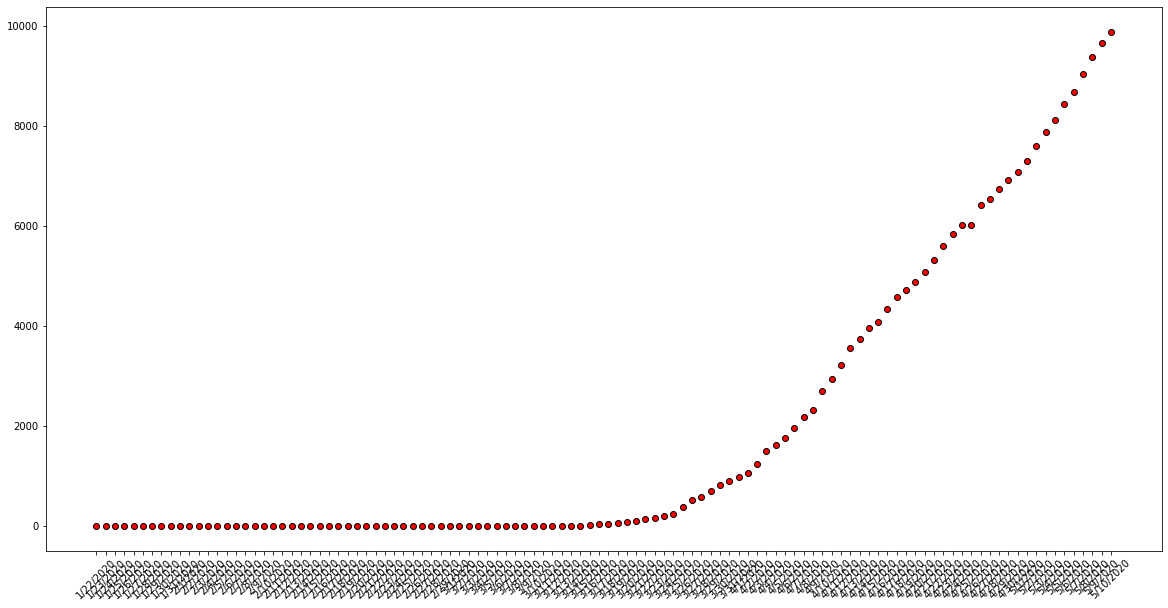

In [5]:
newdataframe = newdataframe.reset_index().rename(columns={'index':'Date'})
plt.figure(figsize=(20,10))
plt.xticks(rotation=45)
plt.scatter(newdataframe['Date'], newdataframe['Alabama'], marker="o", facecolors="red", edgecolors="black")

In [6]:
x = newdataframe[["Date"]]
y = newdataframe["Alabama"].values.reshape(-1, 1)
print(x.shape, y.shape)

(110, 1) (110, 1)


In [7]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

In [11]:
model.fit(x_train, y_train)
training_score = model.score(x_train, y_train)
testing_score = model.score(x_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

ValueError: could not convert string to float: '2/2/2020'